# Fraction of Active Compounds in the Cell Painting Assay

Calculate the fraction of active compounds (Induction >= 5%) in the Cell Painting assay per compound class up to a concentration of

1. 10µM
1. 30µM

In [10]:
%reload_ext autoreload
%autoreload 2
def warn(*args, **kwargs):
    pass  # to silence scikit-learn warnings

import warnings
warnings.filterwarnings('ignore')
warnings.warn = warn

# Stdlib Imports
from pathlib import Path
import sys

# Global package Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project-local Imports
PROJECT_DIR = list(Path("..").absolute().parents)[1]
sys.path.append(str(PROJECT_DIR))
import plt_style
import cpa
import utils as u
from utils import lp

In [3]:
input_dir = "../Input Data"
!ls "$input_dir"

bio_class_comp_well_ids.tsv
cell_painting_data.tsv
chembl_26_natprot_ids_only.tsv
chembl_np_std_np_scout_values_only.tsv
drugbank_sample_100.tsv
drugbank_std_np_scout_values_only.tsv
drugbank_std_subset_np_scout_values_only.tsv
internal_cpds_mc.tsv
internal_cpds_old_cpd_class.tsv
internal_cpds_std_np_scout.tsv
internal_cpds_std_np_scout_values_only.tsv
internal_cpds_std.tsv
internal_cpds.tsv
README.md


## Load Compounds

In [4]:
cpd_ids = pd.read_csv(f"{input_dir}/internal_cpds.tsv", sep="\t")
lp(cpd_ids)

Shape                                             :        244 /    3  [ Compound_Id, CpdClass, Smiles ]  


## Merge Cell Painting Data

In [5]:
cp_data = pd.read_csv(f"{input_dir}/cell_painting_data.tsv", sep="\t")
lp(cp_data)

Shape                                             :        863 /  593  


In [6]:
df_org = pd.merge(cpd_ids, cp_data, on="Compound_Id", how="inner")[["Compound_Id", "CpdClass", "Induction", "Conc_uM"]]
lp(df_org, "Merged CP data")
lp(df_org["Compound_Id"].unique(), "unique compounds")

Shape Merged CP data                              :        863 /    4  [ Compound_Id, CpdClass, Induction, Conc_uM ]  
len(Shape Shape unique compounds)                 :        244


Calculate mean induction for those entries that have been tested multiple times.

In [7]:
df_org = df_org.groupby(by=["Compound_Id", "CpdClass", "Conc_uM"]).mean().reset_index()
lp(df_org)

Shape                                             :        596 /    4  [ Compound_Id, CpdClass, Conc_uM, Induction ]  


### Percent Actives @ 10 µM

Use only the Class as X labels

Shape                                             :        596 /    4  [ Compound_Id, CpdClass, Conc_uM, Induction ]  
Shape                                             :        238 /    4  [ Compound_Id, CpdClass, Conc_uM, Induction ]  


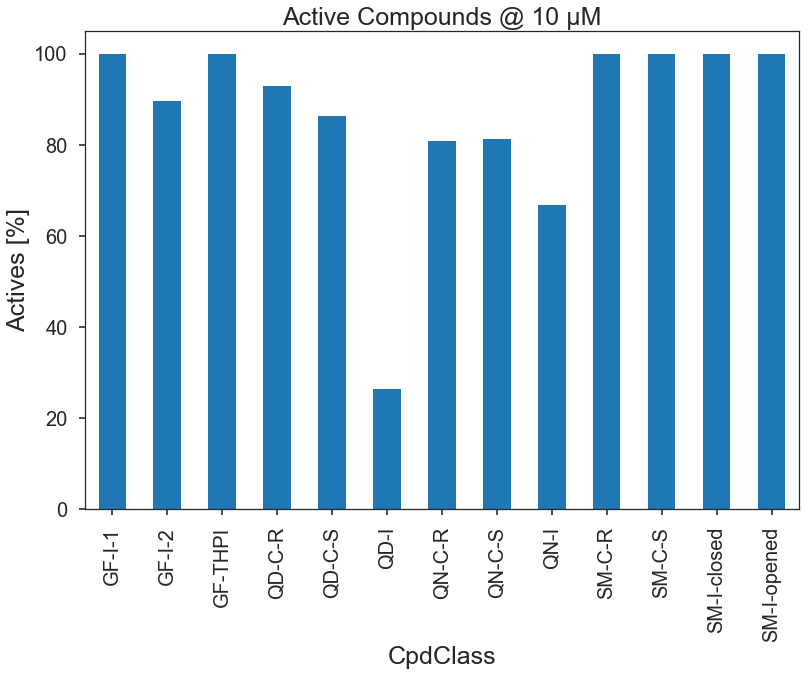

In [8]:
lp(df_org)
df_conc = df_org[df_org["Conc_uM"] == 10.0].copy()
lp(df_conc)
df_grp = df_conc[["CpdClass", "Induction"]].groupby(by=["CpdClass"])

cutoff = 5.0
label_list = []
frctn_list = []
for grp, df_tmp in df_grp:
    # print(group)
    label = grp
    label_list.append(label)
    l = len(df_tmp)
    perc_act = 100 * len(df_tmp[df_tmp["Induction"] >= cutoff]) / l
    frctn_list.append(perc_act)

df_frctn = pd.DataFrame({"CpdClass": label_list, "Actives [%]": frctn_list})
df_frctn = df_frctn.round({"Actives [%]": 1})
df_frctn.to_csv("results/perc_actives@10.tsv", sep="\t", index=False)

bar = df_frctn.plot.bar(x="CpdClass", y="Actives [%]")
plt.legend([])
plt.ylabel("Actives [%]")
plt.title("Active Compounds @ 10 µM")
# fig = plt.figure(figsize=(12, 8))
plt.savefig(f"plots/perc_actives@10.png", bbox_inches='tight');

### Percent Actives up to 30 µM

Use only the Class as X labels

String                                            :     df_org
String                                            :    df_conc
String                                            :    df_conc


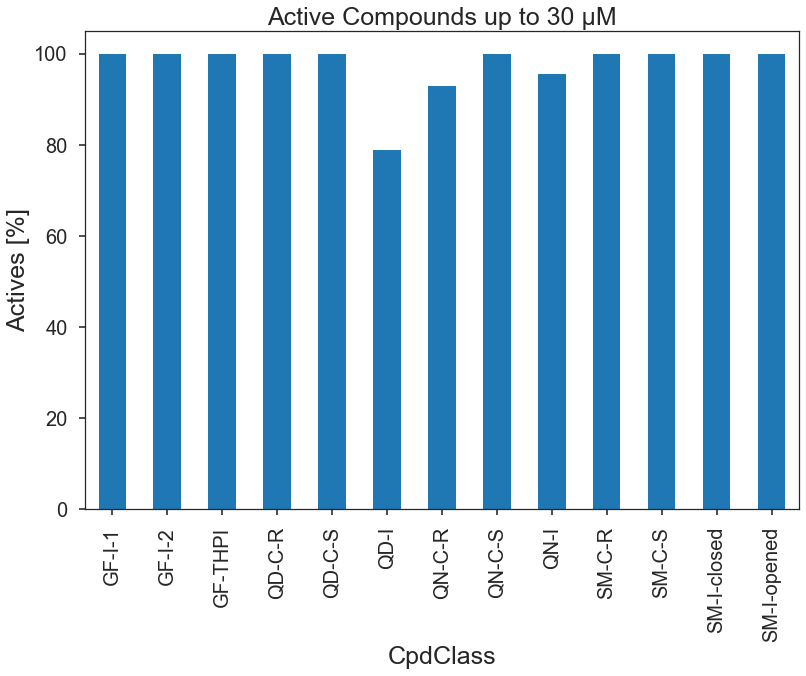

In [9]:
/lp "df_org"
df_conc = df_org[df_org["Conc_uM"] <= 30.0].copy()
/lp "df_conc"
df_conc = df_conc.sort_values("Induction", ascending=False)
df_conc = df_conc.drop_duplicates(subset="Compound_Id")
/lp "df_conc"

df_grp = df_conc[["CpdClass", "Induction"]].groupby(by=["CpdClass"])

cutoff = 5.0
label_list = []
frctn_list = []
for grp, df_tmp in df_grp:
    # print(group)
    label = grp
    label_list.append(label)
    l = len(df_tmp)
    perc_act = 100 * len(df_tmp[df_tmp["Induction"] >= cutoff]) / l
    frctn_list.append(perc_act)

df_frctn = pd.DataFrame({"CpdClass": label_list, "Actives [%]": frctn_list})
df_frctn = df_frctn.round({"Actives [%]": 1})
df_frctn.to_csv("results/perc_actives_upto_30.tsv", sep="\t", index=False)

bar = df_frctn.plot.bar(x="CpdClass", y="Actives [%]")
plt.legend([])
plt.ylabel("Actives [%]")
plt.title("Active Compounds up to 30 µM")
plt.savefig(f"plots/perc_actives_upto30.png", bbox_inches='tight');